
> **Name: Joanna Hazaline Bt Johny**

> **Matric.Num: BI18110016**


In [ ]:
system("apt install libgsl-dev", intern=TRUE)

In [ ]:
install.packages("tm")
library(tm)
install.packages("wordcloud")
library(wordcloud)
install.packages("RColorBrewer")
library(RColorBrewer)
install.packages("topicmodels")
library(topicmodels)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Understanding data and preparing data

Number of files in the folder

In [ ]:
setwd("/content/data")
name <- file.path("/content/data")
length(dir(name))

[1] 7

Folder's path name

In [ ]:
name

[1] "/content/data"

Folder content

In [ ]:
dir(name)

[1] "sou2010.txt" "sou2011.txt" "sou2012.txt" "sou2013.txt" "sou2014.txt"
[6] "sou2015.txt" "sou2016.txt"

In [ ]:
docs <- VCorpus (DirSource(name))
docs

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 7

Text transformation using tm_map() function from tm packages 

In [ ]:
docs <- tm_map (docs, tolower)
docs <- tm_map (docs,removeNumbers)
docs <- tm_map (docs,removePunctuation)
docs <- tm_map (docs, removeWords,stopwords("english"))
docs <- tm_map (docs,stripWhitespace)
docs <- tm_map (docs, removeWords,c("applause","can","cant","will","that","weve","dont","wont","youll","youre"))
docs = tm_map (docs,PlainTextDocument)
dtm = DocumentTermMatrix(docs)
dim(dtm)

[1]    7 4715

Remove sparse terms

In [ ]:
dtm <- removeSparseTerms(dtm, 0.75)
dim (dtm)

[1]    7 2259

In [ ]:
rownames(dtm) <- c("2010","2011","2012","2013","2014","2015","2016")
dtm

<<DocumentTermMatrix (documents: 7, terms: 2259)>>
Non-/sparse entries: 8443/7370
Sparsity           : 47%
Maximal term length: 16
Weighting          : term frequency (tf)

Examine matrix using inspect() function

In [ ]:
inspect(dtm[1:7, 1:5])

<<DocumentTermMatrix (documents: 7, terms: 5)>>
Non-/sparse entries: 20/15
Sparsity           : 43%
Maximal term length: 10
Weighting          : term frequency (tf)
Sample             :
      Terms
Docs   abandon ability able abroad absolutely
  2010       0       1    1      2          2
  2011       1       0    4      3          0
  2012       0       0    3      1          1
  2013       0       3    3      2          1
  2014       0       0    1      4          0
  2015       1       0    1      1          0
  2016       0       0    1      0          0


# Modelling and Evaluation
Explore word frequencies by creating an object with column sums, sorted in descending order using as.matrix() to sum the columns.


In [ ]:
freq <- colSums(as.matrix(dtm))
ord <- order(-freq)
freq[head(ord)]

new america   thats  people    jobs     now 
    193     174     170     169     163     157

In [ ]:
freq[tail(ord)]

wright    written    yearold   youngest youngstown       zero 
         2          2          2          2          2          2

Table to see frequency of words

In [ ]:
head (table(freq))

freq
  2   3   4   5   6   7 
599 353 230 140 136  91 

In [ ]:
tail(table(freq))

freq
157 163 169 170 174 193 
  1   1   1   1   1   1 

findFreqTerm()= see which words occured at least 125 times 
findAssocs() = find associations with words by correlation

In [ ]:
findFreqTerms(dtm,125)

[1] "america"   "american"  "americans" "jobs"      "make"      "new"      
 [7] "now"       "people"    "thats"     "work"      "year"      "years"

In [ ]:
findAssocs(dtm,"jobs",corlimit=0.85)

$jobs
colleges    serve   market  defense      put      tax     came 
    0.97     0.91     0.89     0.87     0.87     0.87     0.86

Produce wordclouds and bar chart for visual potrayal.

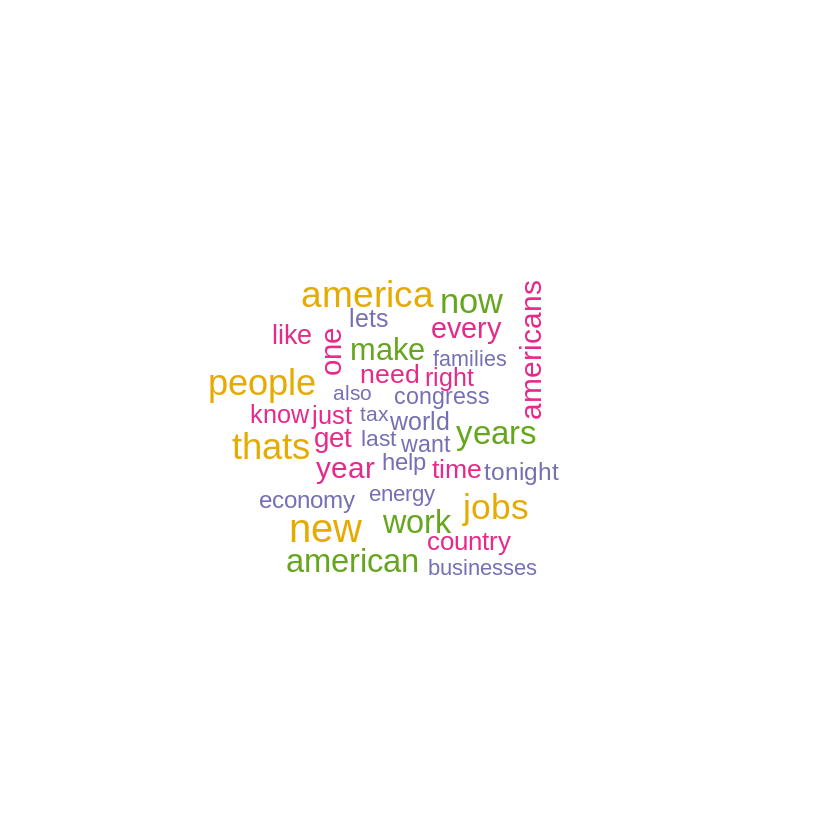

In [ ]:
wordcloud(names(freq),freq,min.freq = 70,scale=c(2,.5),colors = brewer.pal(6,"Dark2"))

Capturing 25 most frequent words

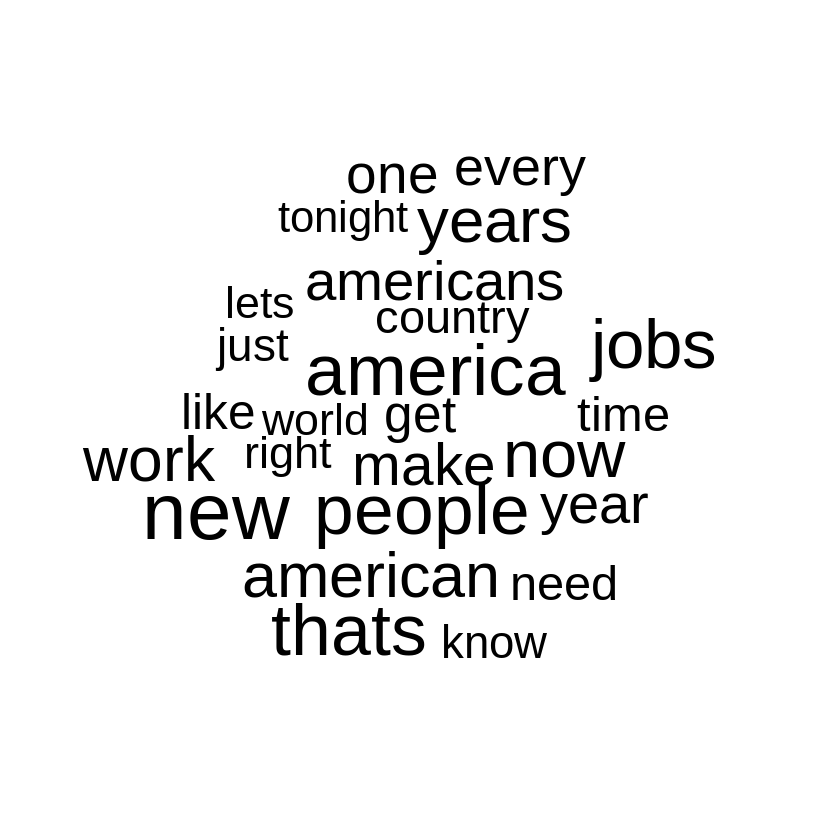

In [ ]:
wordcloud(names(freq),freq,max.words = 25)

Produce a bar chart for 10 most freqeunt words in base R

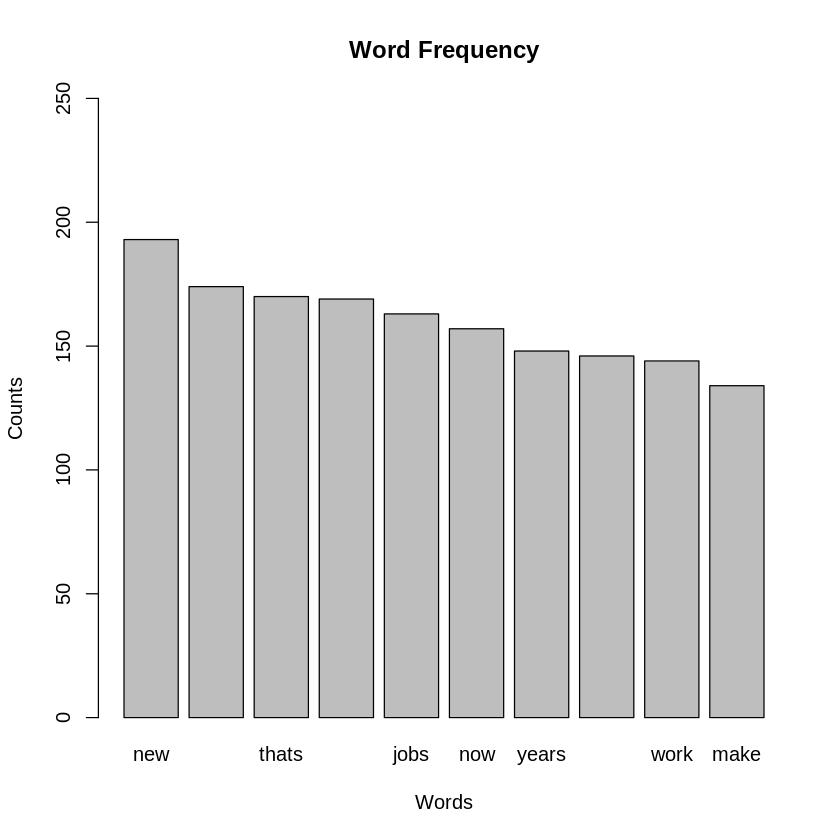

In [ ]:
freq<- sort (colSums(as.matrix(dtm)),decreasing=TRUE)
wf <- data.frame (word=names(freq),freq=freq)
wf <- wf [1:10,]
barplot(wf$freq, names= wf$word, main="Word Frequency",xlab="Words",ylab="Counts",ylim= c(0,250))


a) Show the output produced as shown on Page 23 for the topic modelling.

In [ ]:
set.seed(123)
lda3 <- LDA(dtm, k=3, method ="Gibbs")
topics(lda3)

2010 2011 2012 2013 2014 2015 2016 
   3    1    1    1    2    2    3

# Sentiment Analysis
Load the sms.csv

In [ ]:
library (tm)
sms <- read.csv ("/content/sms.csv", stringsAsFactors = FALSE)
corpus <- iconv(sms$text, to ="utf-8")
corpus <- iconv (sms$text, to='UTF-8', sub = "byte")
corpus <- Corpus (VectorSource(corpus))
inspect(corpus[1:5])

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 5

[1] Hope you are having a good week. Just checking in                                                                                                                
[2] K..give back my thanks.                                                                                                                                          
[3] Am also doing in cbe only. But have to pay.                                                                                                                      
[4] complimentary 4 STAR Ibiza Holiday or £10,000 cash needs your URGENT collection. 09066364349 NOW from Landline not to lose out! Box434SK38WP150PPM18+            
[5] okmail: Dear Dave this is your final notice to collect your 4* Tenerife Holiday or #5000 CASH award! Call 09061743806 from landline. TCs SAE Box326 CW25WX 150ppm


Cleaning the file (converting to lower case)

In [ ]:
corpus<- tm_map(corpus, tolower)

Warning message in tm_map.SimpleCorpus(corpus, tolower):
“transformation drops documents”


In [ ]:
inspect(corpus[1:5])

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 5

[1] hope you are having a good week. just checking in                                                                                                                
[2] k..give back my thanks.                                                                                                                                          
[3] am also doing in cbe only. but have to pay.                                                                                                                      
[4] complimentary 4 star ibiza holiday or £10,000 cash needs your urgent collection. 09066364349 now from landline not to lose out! box434sk38wp150ppm18+            
[5] okmail: dear dave this is your final notice to collect your 4* tenerife holiday or #5000 cash award! call 09061743806 from landline. tcs sae box326 cw25wx 150ppm


Cleaning file (remove punctuation)

In [ ]:
corpus <- tm_map(corpus, removePunctuation)

Warning message in tm_map.SimpleCorpus(corpus, removePunctuation):
“transformation drops documents”


In [ ]:
inspect(corpus[1:5])

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 5

[1] hope you are having a good week just checking in                                                                                                            
[2] kgive back my thanks                                                                                                                                        
[3] am also doing in cbe only but have to pay                                                                                                                   
[4] complimentary 4 star ibiza holiday or £10000 cash needs your urgent collection 09066364349 now from landline not to lose out box434sk38wp150ppm18           
[5] okmail dear dave this is your final notice to collect your 4 tenerife holiday or 5000 cash award call 09061743806 from landline tcs sae box326 cw25wx 150ppm


Cleaning file (remove numbers)

In [ ]:
corpus <- tm_map(corpus, removeNumbers)

Warning message in tm_map.SimpleCorpus(corpus, removeNumbers):
“transformation drops documents”


In [ ]:
inspect(corpus[1:5])

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 5

[1] hope you are having a good week just checking in                                                                                    
[2] kgive back my thanks                                                                                                                
[3] am also doing in cbe only but have to pay                                                                                           
[4] complimentary  star ibiza holiday or £ cash needs your urgent collection  now from landline not to lose out boxskwpppm              
[5] okmail dear dave this is your final notice to collect your  tenerife holiday or  cash award call  from landline tcs sae box cwwx ppm


Cleaning file (remove stopwords)

In [ ]:
cleanset <- tm_map(corpus,removeWords, stopwords("english"))

In [ ]:
inspect(corpus[1:5])

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 5

[1] hope you are having a good week just checking in                                                                                    
[2] kgive back my thanks                                                                                                                
[3] am also doing in cbe only but have to pay                                                                                           
[4] complimentary  star ibiza holiday or £ cash needs your urgent collection  now from landline not to lose out boxskwpppm              
[5] okmail dear dave this is your final notice to collect your  tenerife holiday or  cash award call  from landline tcs sae box cwwx ppm


Cleaning file (Remove url)


In [ ]:
removeURL <- function(x)
gsub("http[[:alnum:]]*",'',x)
cleanset <- tm_map(cleanset, content_transformer(removeURL))
inspect(corpus[1:5])

Warning message in tm_map.SimpleCorpus(cleanset, content_transformer(removeURL)):
“transformation drops documents”


<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 5

[1] hope you are having a good week just checking in                                                                                    
[2] kgive back my thanks                                                                                                                
[3] am also doing in cbe only but have to pay                                                                                           
[4] complimentary  star ibiza holiday or £ cash needs your urgent collection  now from landline not to lose out boxskwpppm              
[5] okmail dear dave this is your final notice to collect your  tenerife holiday or  cash award call  from landline tcs sae box cwwx ppm


Cleaning file (remove stripWhitespace)

In [ ]:
cleanset <- tm_map(cleanset, stripWhitespace)
inspect(corpus[1:5])

Warning message in tm_map.SimpleCorpus(cleanset, stripWhitespace):
“transformation drops documents”


<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 5

[1] hope you are having a good week just checking in                                                                                    
[2] kgive back my thanks                                                                                                                
[3] am also doing in cbe only but have to pay                                                                                           
[4] complimentary  star ibiza holiday or £ cash needs your urgent collection  now from landline not to lose out boxskwpppm              
[5] okmail dear dave this is your final notice to collect your  tenerife holiday or  cash award call  from landline tcs sae box cwwx ppm


Construct term document matrix

In [ ]:
tdm <- TermDocumentMatrix(cleanset)
tdm

<<TermDocumentMatrix (terms: 8252, documents: 5559)>>
Non-/sparse entries: 43750/45829118
Sparsity           : 100%
Maximal term length: 39
Weighting          : term frequency (tf)

In [ ]:
tdm <- as.matrix(tdm)
tdm[1:10, 1:20]

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
checking,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
good,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
hope,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
just,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
week,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
back,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
kgive,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
thanks,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
also,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
cbe,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Plot Bar Chart

In [ ]:
w <- rowSums(tdm)
w <- subset(w,w>=25)
w

good       hope       just       week       back     thanks       also 
       236        104        367        115        152         77         70 
       pay       cash collection    holiday   landline        now     urgent 
        32         74         26         44         34        478         65 
     award        box       call    collect       dear        ppm        tcs 
        29         53        579         27        113         44         29 
       lar      later       pick       much        ask     please       free 
        38        134         71        113         88        131        278 
    mobile       play      right       send       text       room        big 
       139         38         92        191        189         34         37 
      hour        man       sure      thing     though   anything        lor 
        30         45         71         61         26         75        160 
      hows      never    problem      ready       will       work      night 
        45         44         35         41        380        100        115 
      well        get        ill        see      whats       cool        cos 
       134        388        239        157         33         42         76 
       dat        den     dinner        dun       feel      leave      lunch 
        39         32         35         55         60         55         45 
      meet    meeting       tell       told       come        wan        can 
        78         43        137         53        228         57        405 
      draw      every       gift        txt        win       word     coming 
        43         73         28        163         73         34         50 
  birthday      today       wish        gud    contact       cost        one 
        36        141         52         64         68         33        171 
    school       sent      think       love      money        say       need 
        27         68        132        197         57         92        166 
      stop      thanx       plan     todays       care      sorry    morning 
       155         32         32         28         69        156         77 
     sleep     camera      nokia       part       plus       take        won 
        57         36         72         31         25        126         73 
      cant        leh       make       said       wait       hear      might 
       124         29         99         87         59         32         34 
     texts        got        job       chat       pmin     anyway       help 
        26        240         43         57         26         26         59 
      know        let     theres        use       yeah       like  something 
       257         70         30         44         86        244         70 
       min    awarded      claim guaranteed        hrs       line     number 
        42         38        113         50         32         42         94 
     prize   tomorrow        wat        ive        hey        sat       want 
        92         90         96         74        111         28        190 
     still        yup      going       away       last      enjoy      world 
       154         43        170         26         78         37         33 
       hes    minutes     really    decimal       give      entry    already 
        32         32         86         25        102         26         90 
      fine      thats    thought      watch       soon        hav      quite 
        45         95         47         33         58         26         34 
       bed        car      didnt       left       many      phone      stuff 
        32         39         79         30         59        124         50 
      time      times       look        lot        abt       dont       even 
       214         25         31         37         26        287         62 
       plz     things      heart    someone       babe        day       goes 
        25         53       

Construct Term Document Matrix

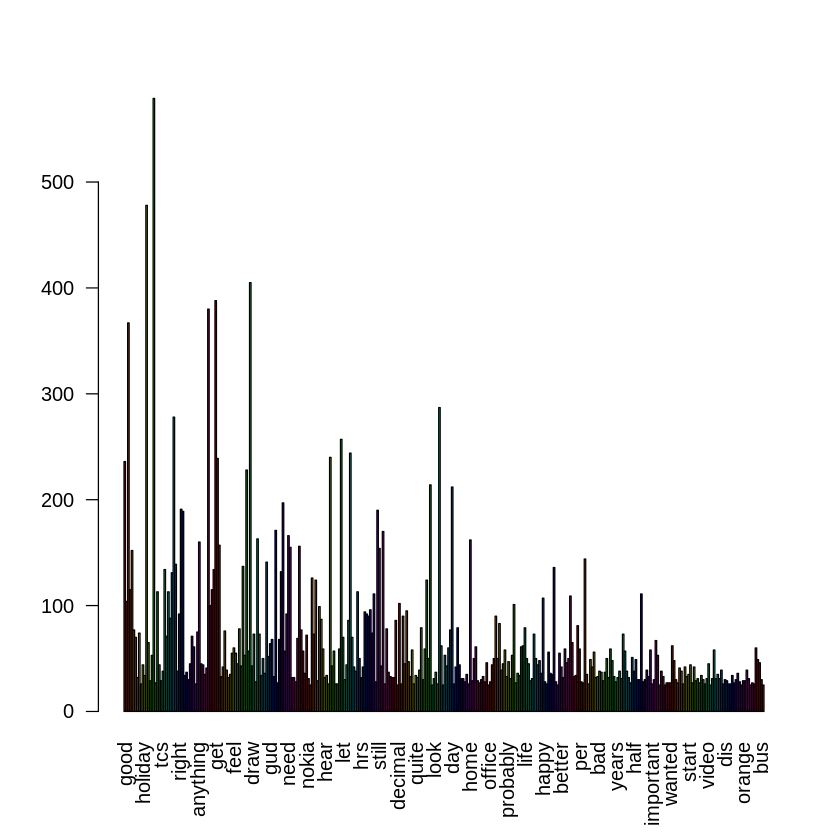

In [ ]:
barplot(w, las=2, col= rainbow(50))

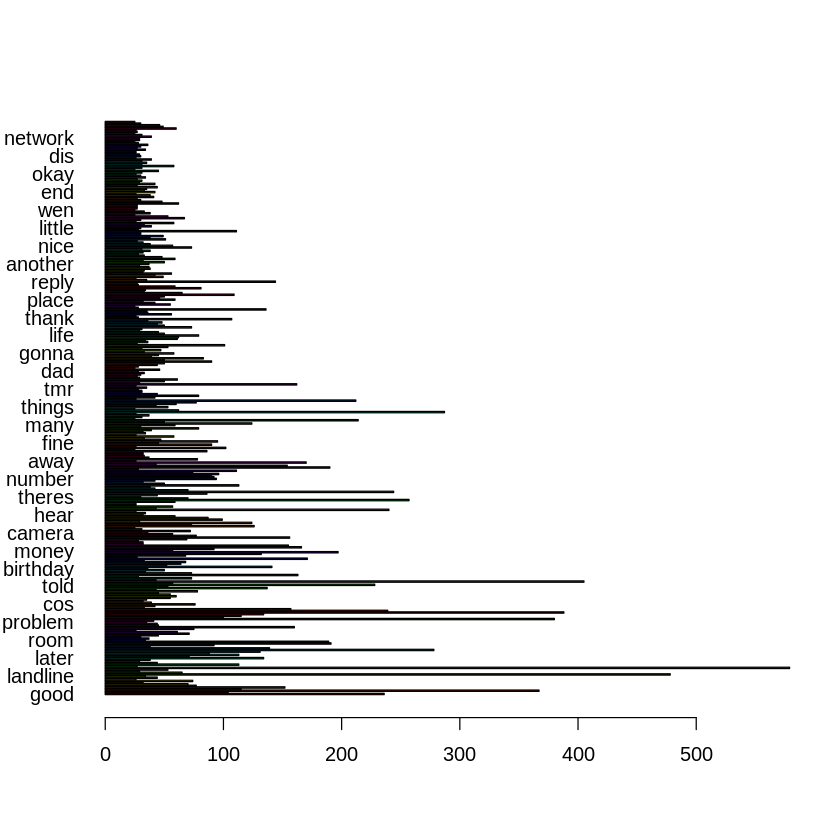

In [ ]:
barplot(w, las=1, horiz=T, col=rainbow(50))

Load all libraries

In [ ]:
#Sentiment Analysis
install.packages("syuzhet")
library(syuzhet)
install.packages("lubridate")
library(lubridate)
install.packages("ggplot2")
library(ggplot2)
install.packages("gscales")
library(scales)
install.packages("reshape2")
library(reshape2)
install.packages("dplyr")
library(dplyr)

sentiment <- read.csv ("/content/sms.csv", stringsAsFactors = FALSE)
sms <- iconv (sentiment$text, to ="utf-8")
s <- get_nrc_sentiment(sms)
head(s)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘gscales’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following object is masked from ‘package:ggplot2’:

    vars


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from

,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,2,0,0,2,0,2,2,0,2
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,1,0,0,1,0,1
4,2,4,1,3,3,1,2,2,2,3
5,1,3,0,1,3,0,1,2,0,4
6,0,0,0,0,0,0,0,0,0,1


In [ ]:
tail(s)

,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5554,0,1,0,0,0,0,0,0,0,1
5555,0,3,0,1,3,0,2,2,0,6
5556,0,1,0,0,0,0,0,0,0,0
5557,0,0,0,0,0,0,0,0,0,1
5558,0,0,0,0,0,0,0,0,0,1
5559,0,0,0,0,1,0,0,1,0,2


Inspect sms no.4

In [ ]:
sms[4]

[1] "complimentary 4 STAR Ibiza Holiday or £10,000 cash needs your URGENT collection. 09066364349 NOW from Landline not to lose out! Box434SK38WP150PPM18+"

In [ ]:
get_nrc_sentiment('urgent')

anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,1,0,1,0,0,1,0,1,0


In [ ]:
get_nrc_sentiment('lose')

anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,1,1,0,1,1,0,1,0


Plot sentiment works

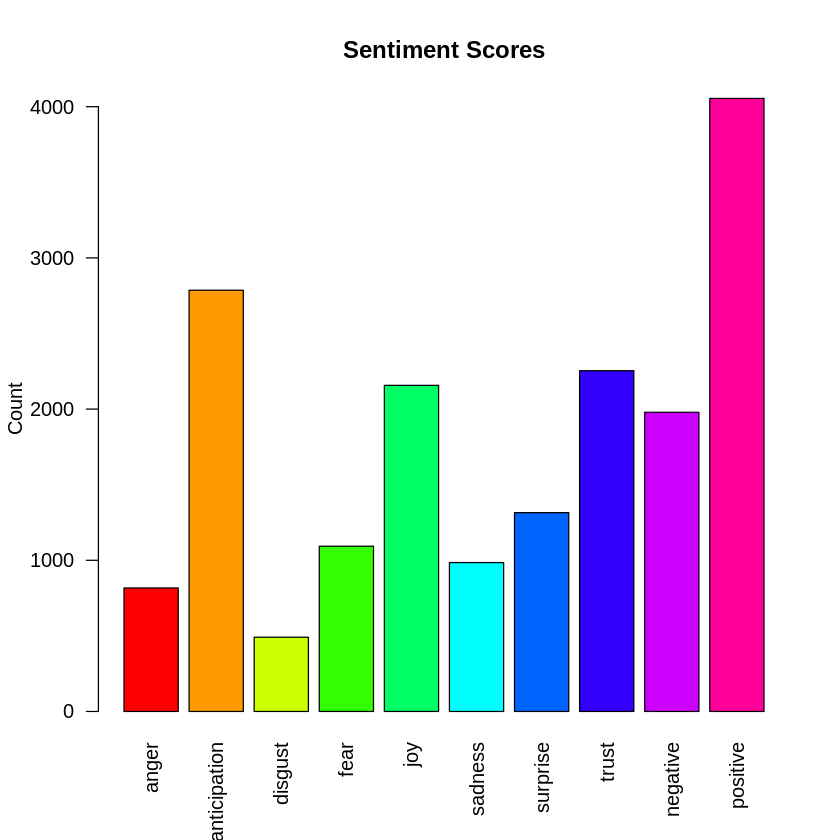

In [ ]:
barplot(colSums(s), las=2, col=rainbow(10),ylab='Count',main='Sentiment Scores')